In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [0]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [3]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()
df.iloc[:,1]=scaler.fit_transform(df.iloc[:,1])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,1,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.iloc[:,2]=scaler.fit_transform(df.iloc[:,2])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [0]:
y=df['Exited']
x=df.drop('Exited',axis=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [0]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(15, activation='relu', input_shape=[10]),
  tf.keras.layers.Dense(15, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')                                  
  
])


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4951 - accuracy: 0.7986 - val_loss: 0.4329 - val_accuracy: 0.8145
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8170 - val_loss: 0.4004 - val_accuracy: 0.8330
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8324 - val_loss: 0.3795 - val_accuracy: 0.8460
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8438 - val_loss: 0.3683 - val_accuracy: 0.8520
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8499 - val_loss: 0.3604 - val_accuracy: 0.8535
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8539 - val_loss: 0.3525 - val_accuracy: 0.8555
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.8553 - val_loss: 0.3523 - val_accuracy: 0.8545

In [11]:
print("Train score:", model.evaluate(x_train, y_train))
print("Test score:", model.evaluate(x_test, y_test))

250/250 [==============================] - 0s 1ms/step - loss: 0.3135 - accuracy: 0.8690
Train score: [0.31350964307785034, 0.8690000176429749]
63/63 [==============================] - 0s 1ms/step - loss: 0.3464 - accuracy: 0.8550
Test score: [0.3464483320713043, 0.8550000190734863]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


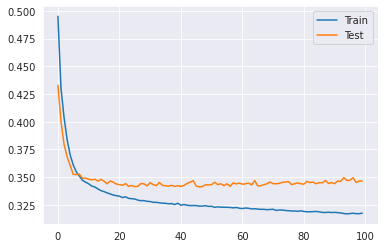

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.plot(r.history['loss'],label='Train')
plt.plot(r.history['val_loss'],label='Test')
plt.legend()

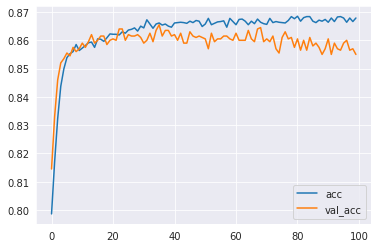

In [13]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
y_pred=model.predict(x_test)

In [0]:
y_pred=y_pred>0.5

In [16]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1536,   71],
       [ 219,  174]])

In [0]:
"""Predict if the customer with the following informations will leave the bank:
Geography: France
Credit Score: 600
Gender: Male
Age: 40
Tenure: 3
Balance: 60000
Number of Products: 2
Has Credit Card: Yes
Is Active Member: Yes
Estimated Salary: 50000"""
prediction=model.predict([[ 000, 0, 1, 40, 3, 00000, 2, 1, 1, 50000]])

In [19]:
prediction

array([[0.04579153]], dtype=float32)

In [20]:
result=prediction>0.05
result

array([[False]])